# Introducción a Pandas para análisis de series temporales - Webinar 

Este Notebook ha sido elaborado por [@Paduel](https://t.me/paduel) para el grupo de Telegram ['Python para Trading'](https://t.me/pythontrading).


## Módulos 

Vamos a utilizar el módulo **Pandas** que permite manejar de forma eficiente datos estructurados. Un **DataFrame** de Pandas es una matriz ordenada que puede contener cualquier tipo de datos. 


Se ordena en columnas, que deben contener siempre un mismo tipo de dato, y en filas que generan un indice.

Para descargar los datos utilizaremos **yfinance** que permite descargar datos de series históricas desde Yahoo Finance en formato de dataframe de Pandas.

Los calculos mas complejos los resolveremos con el módulo **Numpy**.

Para las gráficas inicialmente utilizaremos la librería **Matplotlib**.

Y para utilizar datos temporales adecuadamente **Datetime**.

Si quieres correr este código, debes asegurarte tener instalados correctamente los paquetes mencionados.

In [1]:
import pandas as pd # Importamos Pandas y para simplificar le asignamos el nombre pd

pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import yfinance as yf # Importamos yfinance y le asociamos el nombre yf
import numpy as np # Importamos Numpy y le asociamos el nombre np
import datetime # Importamos datetime pero en este caso no vamos a asignarle ningún nombre

# Para graficar correctamente en el notebook hacemos lo siguiente
%matplotlib inline   
# esto hace que los gráficos se visualicen en el notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 18, 8 # Definimos el tamaño de los gráficos para que se ajusten bien al notebook
plt.style.use('ggplot')



In [2]:
plt.rcParams['figure.figsize'] = 18, 8 # Definimos el tamaño de los gráficos para que se ajusten bien al notebook


---

## Descarga de datos

Descargaremos el histórico diario de Santander y BBVA desde principios de 2008 hasta final de 2017, diez años.
Para ello pasaremos como parámetros los tickers de los valores y las fechas de inicio y fin. Los tickers para otros valores se pueden localizar en la página de Yahoo.

In [3]:
start = datetime.datetime(2008, 1, 1)
end=datetime.datetime(2018, 8, 28)
tickers=['SAN.MC', 'BBVA.MC']

In [4]:
san = yf.download(tickers[0], start=start, end=end, as_panel=False)

[*********************100%***********************]  1 of 1 completed


In [5]:
bbva=yf.download(tickers[1], start=start, end=end, as_panel=False)

[*********************100%***********************]  1 of 1 completed


Lo que recibimos en la variable __san__ es un **DataFrame** de Pandas, una matriz de dos dimensiones, algo similar al un hoja de calculo de Excel.

---

## Inspección de los datos recibidos

In [6]:
san.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2.722000e+03
mean,6.724599,6.816525,6.616637,6.720640,4.300206,9.762107e+07
std,2.108794,2.134924,2.074220,2.107386,0.850252,7.475152e+07
min,3.117870,3.327370,3.098200,3.245730,1.804528,7.377082e+06
25%,5.329917,5.399180,5.266205,5.335198,3.611262,5.439540e+07
50%,6.098050,6.185675,5.977885,6.094115,4.405718,7.631684e+07
75%,7.835568,7.965147,7.690938,7.818043,5.023512,1.144394e+08
max,13.248900,13.330200,13.095300,13.176600,5.915002,9.092368e+08


In [7]:
bbva.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2.722000e+03
mean,8.065533,8.171825,7.939705,8.061284,5.249029,5.290963e+07
std,2.085588,2.101598,2.061220,2.082101,1.053261,4.678890e+07
min,4.400000,4.540000,4.275310,4.430000,2.360616,5.217450e+06
25%,6.480000,6.555000,6.376000,6.478500,4.402878,2.723342e+07
50%,7.680500,7.777000,7.553500,7.668370,5.266580,3.937147e+07
75%,9.085250,9.197250,8.953348,9.074500,6.179730,6.129662e+07
max,16.102100,16.159700,15.852300,15.929100,7.711745,6.009019e+08


In [8]:
bbva.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2722 entries, 2008-01-02 to 2018-08-27
Data columns (total 6 columns):
Open         2722 non-null float64
High         2722 non-null float64
Low          2722 non-null float64
Close        2722 non-null float64
Adj Close    2722 non-null float64
Volume       2722 non-null int64
dtypes: float64(5), int64(1)
memory usage: 148.9 KB


In [9]:
bbva.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2722 entries, 2008-01-02 to 2018-08-27
Data columns (total 6 columns):
Open         2722 non-null float64
High         2722 non-null float64
Low          2722 non-null float64
Close        2722 non-null float64
Adj Close    2722 non-null float64
Volume       2722 non-null int64
dtypes: float64(5), int64(1)
memory usage: 148.9 KB


In [10]:
bbva.head() # comprobamos los primeros datos de BBVA

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,16.1021,16.1597,15.8523,15.9291,7.711745,98910228
2008-01-03,15.9291,15.9291,15.6986,15.7946,7.646628,90699092
2008-01-04,15.7946,15.7946,15.3239,15.4680,7.488512,138136794
2008-01-07,15.4680,15.5929,15.3719,15.5352,7.521047,32842185
2008-01-08,15.5352,15.5833,15.1990,15.2374,7.376875,87804410


Revisamos las dimensiones de cada dataframe, vemos que tienen dos dimensiones. 

2723 filas correspondientes a los días de cotización, y 6 columnas para los distintos datos.

In [11]:
san.shape, bbva.shape

((2722, 6), (2722, 6))

Veamos algunas características del dataframe del Santander.

In [12]:
san.index # su indice son las fechas de los dias cotizados

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2018-08-14', '2018-08-15', '2018-08-16', '2018-08-17',
               '2018-08-20', '2018-08-21', '2018-08-22', '2018-08-23',
               '2018-08-24', '2018-08-27'],
              dtype='datetime64[ns]', name='Date', length=2722, freq=None)

In [13]:
san.columns # las columnas recogen los distintos valores de cada dia

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Podemos acceder a la información seleccionando los datos de múltiples formas.

In [14]:
san[['Close', 'Low', 'Volume']][-10:] # Veamos los diez últimos valores de cierre del Santander.

,Close,Low,Volume
Date,,,
2018-08-14,4.4185,4.3950,77761672
2018-08-15,4.3355,4.3000,46449338
2018-08-16,4.3695,4.3385,35213008
2018-08-17,4.3395,4.3110,42357176
2018-08-20,4.3495,4.3345,19670206
2018-08-21,4.4000,4.3425,30725386
2018-08-22,4.3525,4.3455,65903607
2018-08-23,4.3570,4.3300,21502679
2018-08-24,4.3500,4.3450,20338430


In [15]:
san[['High','Low']].head() # Los 5 primeros mínimos y máximos

,High,Low
Date,,
2008-01-02,13.3302,13.0953
2008-01-03,13.2037,12.9689
2008-01-04,13.0863,12.7070
2008-01-07,12.9057,12.6889
2008-01-08,12.8063,12.4993


In [16]:
san[['Adj Close','Volume']].loc['2015-11-01':'2015-11-10'] 
# El cierre ajustado y el volumen desde el 1 al 10 de noviembre de 2015

,Adj Close,Volume
Date,,
2015-11-02,4.202013,57910507
2015-11-03,4.242843,148301916
2015-11-04,4.307350,105920462
2015-11-05,4.251826,87484985
2015-11-06,4.331842,86906805
2015-11-09,4.240386,71676192
2015-11-10,4.225691,39123435


Estos son algunos ejemplos de la facilidad que nos proporciona Pandas para segmentar los datos. Cualquier combinación de filtros sería posible.

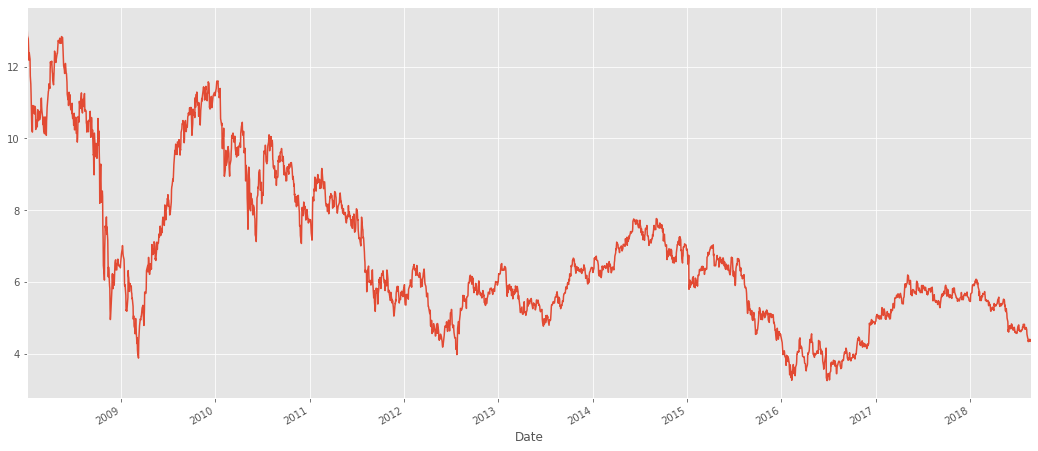

In [17]:
san.Close.plot()

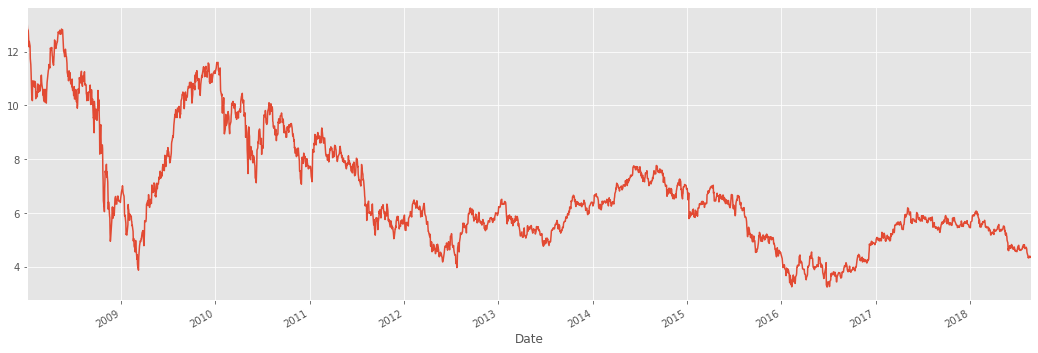

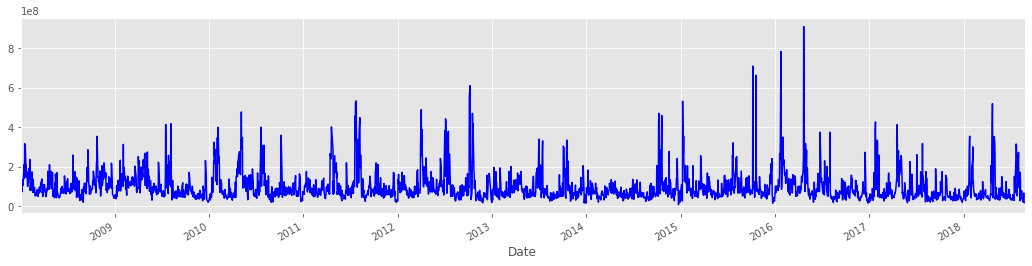

In [18]:
san.Close.plot(figsize=(18,6))
plt.show()
san.Volume.plot(c='b', figsize=(18,4))
plt.show()

---

## Usando los datos

Vamos a ver como podemos utilizar los datos para generar un nuevo dataframe y después hacer una gráfica sencilla.

Tomamos los datos de cierre ajustado de ambos valores con ellos creamos el dataframe **diario**.

In [19]:
diario=pd.DataFrame() # creamos un dataframe vacío
diario['san']=san['Adj Close'] # añadimos una columna con los datos de cierre del Santander y la nombramos 'san'
diario['bbva']=bbva['Adj Close'] # lo mismo para el BBVA

In [20]:
diario.head(7) # veamos su cabecera

,san,bbva
Date,,
2008-01-02,5.637910,7.711745
2008-01-03,5.583828,7.646628
2008-01-04,5.502660,7.488512
2008-01-07,5.467916,7.521047
2008-01-08,5.382898,7.376875
2008-01-09,5.274687,7.283823
2008-01-10,5.212863,7.193738


In [21]:
diario.tail(7) # y su final

,san,bbva
Date,,
2018-08-17,4.072657,4.796292
2018-08-20,4.082042,4.775132
2018-08-21,4.129436,4.845665
2018-08-22,4.084857,4.894157
2018-08-23,4.089081,4.868589
2018-08-24,4.082511,4.878287
2018-08-27,4.115359,4.911791


Creamos la gráfica con el cierre ajustado de ambos valores.

Pandas dispone de sus propios metodos para llamar al modulo Matplotlib, de forma que graficar un dataframe es muy sencillo.

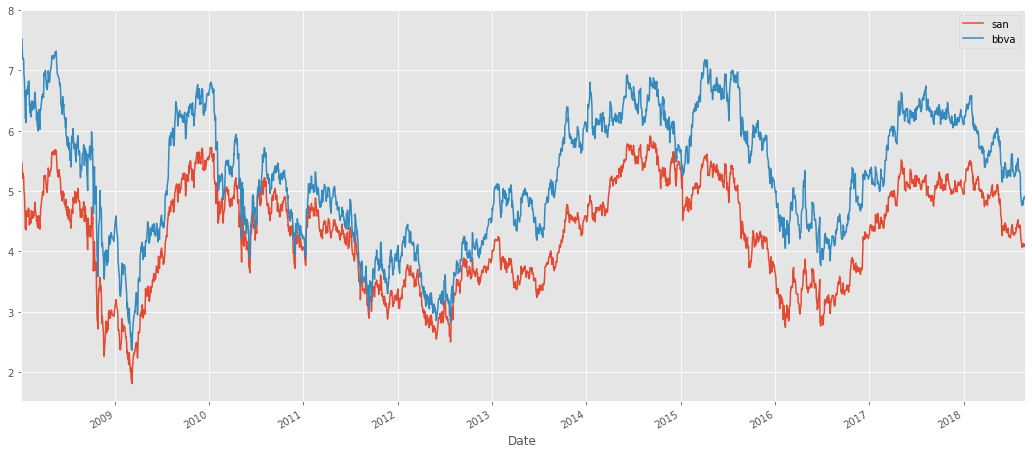

In [22]:
diario.plot() 

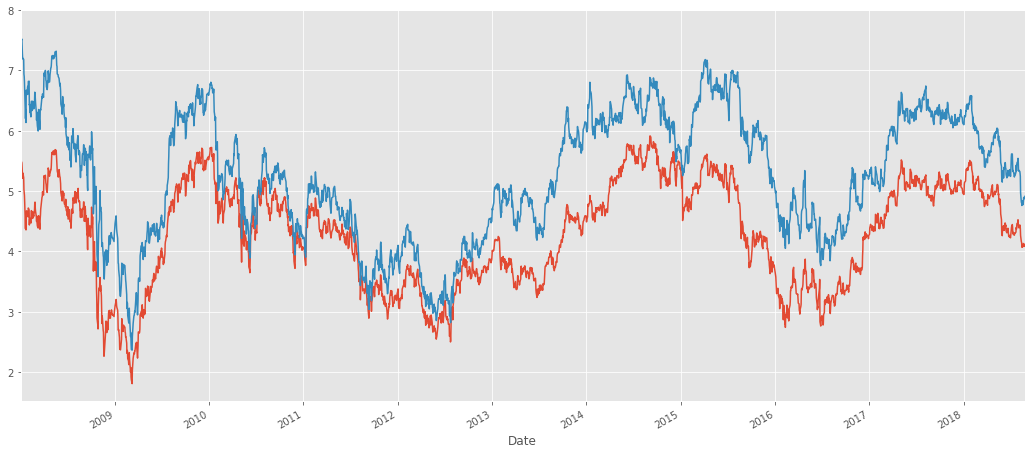

In [23]:
san['Adj Close'].plot()
bbva['Adj Close'].plot()

Podemos ver la gráfica de solo un año.

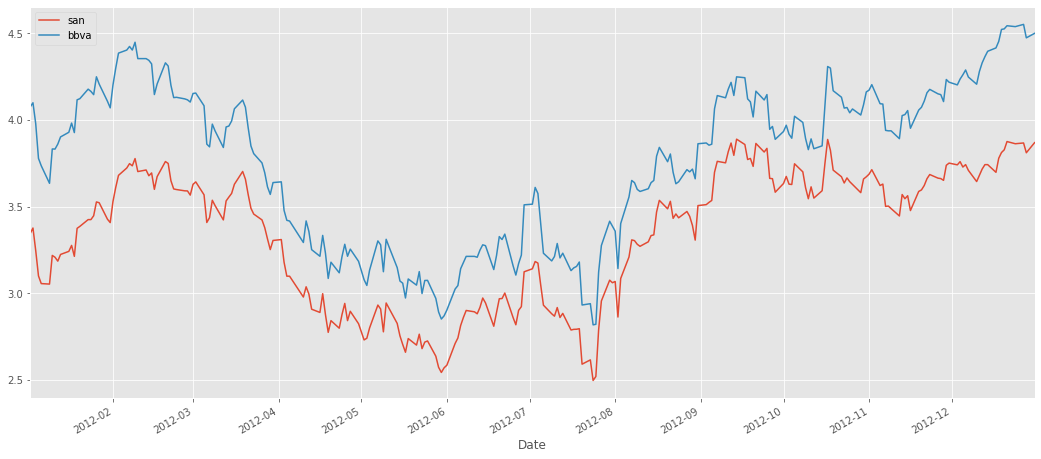

In [24]:
diario['2012'].plot()

---

# Remuestreo de datos

Los datos que tenemos son diarios, pero tal vez nos interesa la evolución mensual.

Pandas nos ofrece la función **resample** para hacer un remuestreo de los datos para una frecuencia temporal distinta.

Incluyendo **ohlc()** nos va a calcular la apertura, máximo, mínimo y cierre de una serie. Tomemos la serie de cierres del Santander para verlo

In [25]:
san.Close.resample('M').ohlc().head()  # Usamos head() para visualizar solo los 5 primeros valores de la tabla.

,open,high,low,close
Date,,,,
2008-01-31,13.1766,13.1766,10.1782,10.6840
2008-02-29,10.9007,11.1265,10.2505,10.7743
2008-03-31,10.5666,11.5239,10.0879,11.3975
2008-04-30,11.9213,12.5083,11.4968,12.5083
2008-05-31,12.7341,12.8425,11.8129,12.0929


Sin embargo toma el primer cierre, y el máximo y mínimo del cierre del mes. Pero si nos interesa la verdadera apertura del mes, el máximo y mínimos reales de la cotización del mes, y no los valores máximo y mínimo del cierre, podemos calcularlo de otra manera.

Utilizando la función **resample** de pandas e indicándole como hacer el remuestreo para cada columna podemos hacerlo fácilmente.

En este caso definiremos una función para hacer el remuestreo a cualquier dataframe de las mismas características.

In [26]:
def remuestreo(df, tiempo):
    df=df.resample(tiempo).agg({'Open': 'first', 
                                     'High': 'max', 
                                     'Low': 'min', 
                                     'Close': 'last',
                                     'Adj Close': 'last',
                                     'Volume': 'sum'})
    return df

Las funciones nos permiten aplicar un mismo proceso a distintas variables. 

In [27]:
san_mes=remuestreo(san,'M')
bbva_mes=remuestreo(bbva, 'M')

Veamos los primeros meses de BBVA.

In [28]:
bbva_mes.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-31,16.1021,16.1597,11.9228,13.5177,6.611106,1649477521
2008-02-29,13.5177,14.1902,12.5857,13.2198,6.465414,845263801
2008-03-31,13.2198,13.6810,12.1726,13.4024,6.554717,981652411
2008-04-30,13.4024,14.4304,13.2775,14.1902,7.080309,1561042865
2008-05-31,14.1902,14.7955,13.6426,13.7675,6.869399,538775611


In [29]:
san.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-21,4.3495,4.4355,4.3425,4.4000,4.129436,30725386
2018-08-22,4.3900,4.4045,4.3455,4.3525,4.084857,65903607
2018-08-23,4.3690,4.3865,4.3300,4.3570,4.089081,21502679
2018-08-24,4.3450,4.3880,4.3450,4.3500,4.082511,20338430
2018-08-27,4.3740,4.3945,4.3430,4.3850,4.115359,16468482


Podemos hacer otro remuestreo con un valor temporal distinto simplemente cambiando el valor de tiempo por otro como '3M', 'W', '2Y'.

---

## Agrupando 

La función **groupby** nos permite agrupar los valores de un DataFrame en base a un cierto valor, para realizar un calculo sobre esos grupos.

En este ejemplo con una sola linea graficamos los retornos diarios medios del Santander por día de la semana.

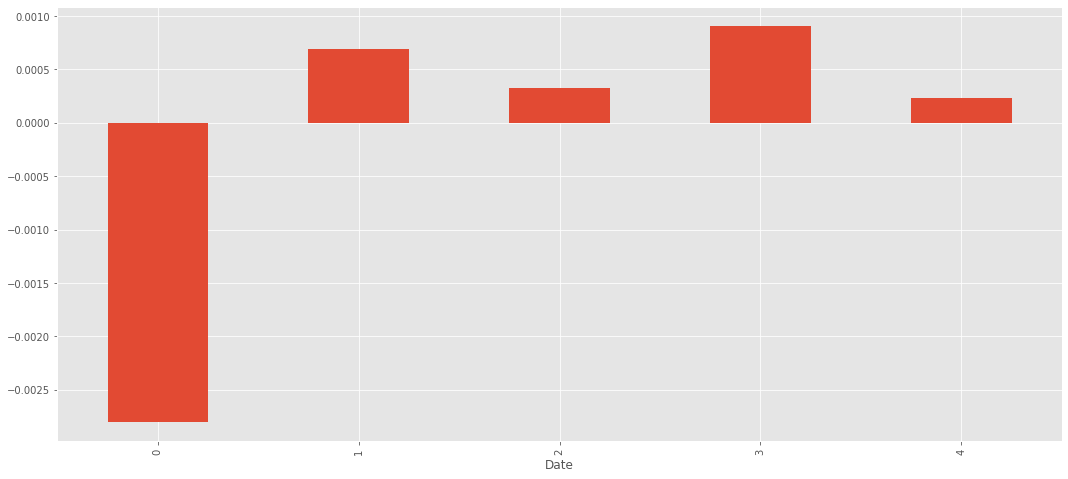

In [30]:
san.Close.pct_change().groupby(san.index.dayofweek).mean().plot(kind='bar')

Vemos que de media los lunes los retornos son negativos, frente al resto de días de la semana que son positivos, aunque su media es mas cercana a cero.

Trazamos el mismo gŕafico para el BBVA, y vemos que sucede algo similar.

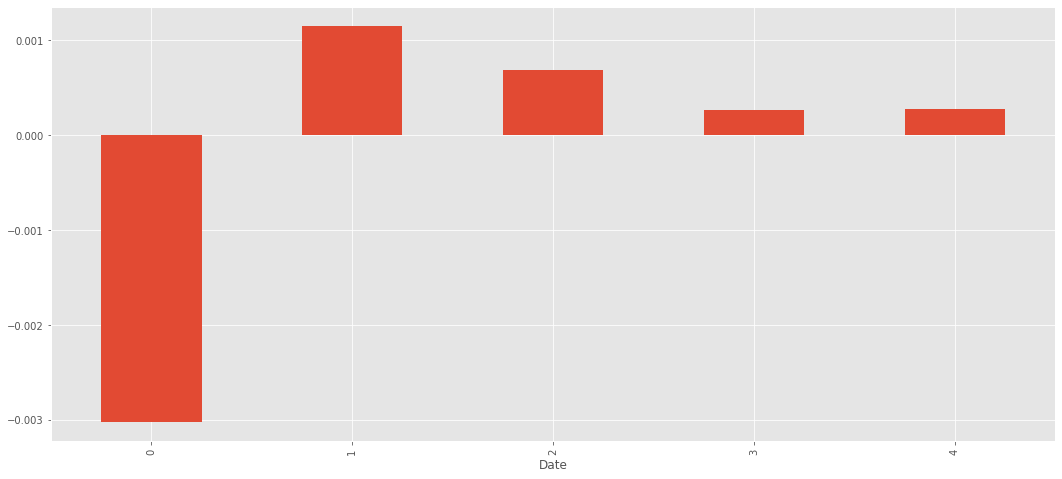

In [31]:
bbva.Close.pct_change().groupby(san.index.dayofweek).mean().plot(kind='bar')

---

## Añadiendo y modificando columnas

Hasta ahora hemos trabajado con las columnas de los datos que descargamos, creemos nuevas columnas con datos calculados a partir de los iniciales.

Vamos a calcular la apertura, máximo y mínimo ajustado de la serie temporal. 
De nuevo definimos una función para reutilizar el código.

In [32]:
def ajustado(df, lista):
    df=df.copy()
    for f in lista:
        df['Adj '+f]=df[f]*df['Adj Close']/df['Close']
    return df

In [33]:
san_ajustado=ajustado(san, ['Open','High','Low'])

In [34]:
san_ajustado.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low
Date,,,,,,,,,
2008-01-02,13.2489,13.3302,13.0953,13.1766,5.637910,103998100,5.668846,5.703632,5.603124
2008-01-03,13.1405,13.2037,12.9689,13.0502,5.583828,113222703,5.622465,5.649506,5.549042
2008-01-04,13.0050,13.0863,12.7070,12.8605,5.502660,100543802,5.564488,5.599274,5.436982
2008-01-07,12.8154,12.9057,12.6889,12.7793,5.467916,71995342,5.483363,5.522000,5.429237
2008-01-08,12.7883,12.8063,12.4993,12.5806,5.382898,83100401,5.471767,5.479469,5.348112


No está mal. Pero hagamos que la función elimine los valores no ajustados y ordene correctamente las columnas.

Para comodidad eliminaremos de las columnas el prefijo Adj, ya sabemos que los valores que quedan están ajustados.

Estas funciones pueden ser copiadas para utilizar en otro código o con otros valores, por lo que merece la pena utilizar un poco de tiempo en definir funciones de las tareas que mas vamos a repetir.

O incluso recogerlas en un modulo personal con herramientas o utilidades.

In [35]:
def ajustado(df):
    df=df.copy()
    lista=['Open','High','Low']
    
    for f in lista:
        df[f]=df[f]*df['Adj Close']/df['Close']
    df=df.drop('Close', axis=1)
    df=df.rename(columns = {'Adj Close': 'Close'} )
    return df

In [36]:
san=ajustado(san)
san.head()

,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,5.668846,5.703632,5.603124,5.637910,103998100
2008-01-03,5.622465,5.649506,5.549042,5.583828,113222703
2008-01-04,5.564488,5.599274,5.436982,5.502660,100543802
2008-01-07,5.483363,5.522000,5.429237,5.467916,71995342
2008-01-08,5.471767,5.479469,5.348112,5.382898,83100401


In [37]:
bbva = ajustado(bbva)

In [38]:
bbva.head()

,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.795499,7.823385,7.674563,7.711745,98910228
2008-01-03,7.711744,7.711744,7.600152,7.646628,90699092
2008-01-04,7.646628,7.646628,7.418749,7.488512,138136794
2008-01-07,7.488514,7.548981,7.441989,7.521047,32842185
2008-01-08,7.521049,7.544335,7.358284,7.376875,87804410


---

## Añadiendo indicadores

Los indicadores son una herramienta básica en el análisis de series temporales financieras. 

Veamos como añadir una media simple usando solo Pandas.

In [39]:
san['SMA_7']=san['Close'].rolling(window=7).mean() # Media simple de 7 días
san['SMA_14']=san['Close'].rolling(window=14).mean() # Media simple de 14 días

In [40]:
san.head(25)

,Open,High,Low,Close,Volume,SMA_7,SMA_14
Date,,,,,,,
2008-01-02,5.668846,5.703632,5.603124,5.637910,103998100,NaN,NaN
2008-01-03,5.622465,5.649506,5.549042,5.583828,113222703,NaN,NaN
2008-01-04,5.564488,5.599274,5.436982,5.502660,100543802,NaN,NaN
2008-01-07,5.483363,5.522000,5.429237,5.467916,71995342,NaN,NaN
2008-01-08,5.471767,5.479469,5.348112,5.382898,83100401,NaN,NaN
2008-01-09,5.336515,5.359706,5.266943,5.274687,120300001,NaN,NaN
2008-01-10,5.290137,5.301732,5.174226,5.212863,132219917,5.437538,NaN
2008-01-11,5.274688,5.324920,5.185819,5.297879,103739924,5.388962,NaN
2008-01-14,5.297880,5.309475,5.185820,5.224457,164859458,5.337623,NaN


Aparecen valores nulos NaN , pues hasta que no tiene datos suficientes no puede calcular la media.


Graficamos los últimos 500 valores para observar las medias.

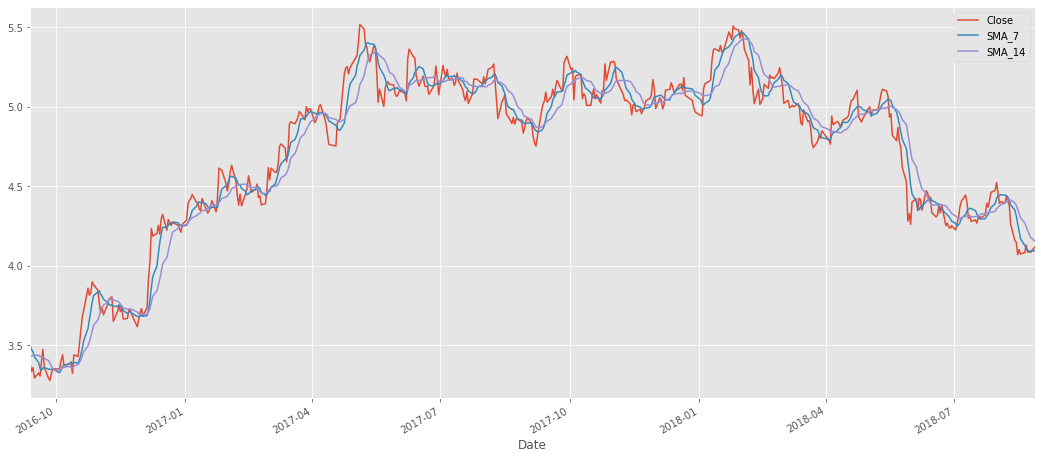

In [41]:
san[['Close','SMA_7','SMA_14']].iloc[-500:].plot()

Pandas nos ofrece la oportunidad de crear otros indices mas complejos. Sin embargo si queremos facilitar el trabajo existe un modulo con indicadores para pandas llamado **Technical Analysis Library**, https://github.com/bukosabino/ta, que nos proporciona la forma de calcular muchos indices.

Se puede instalar con **pip install ta**.

In [42]:
# !pip install ta 
# Quita la almohadilla al inicio de la primera linea y ejecuta la celda 
# para instalar la librería ta si no la tienes ya instalada

In [43]:
import ta 

Calculemos ahora las medias exponenciales de 20 y 60 días.

In [44]:
san['EMA_20'] = ta.trend.ema_indicator(san['Close'], 20)
san['EMA_60'] = ta.trend.ema_indicator(san['Close'], 60)

Gráficamos los 1000 primeros días.

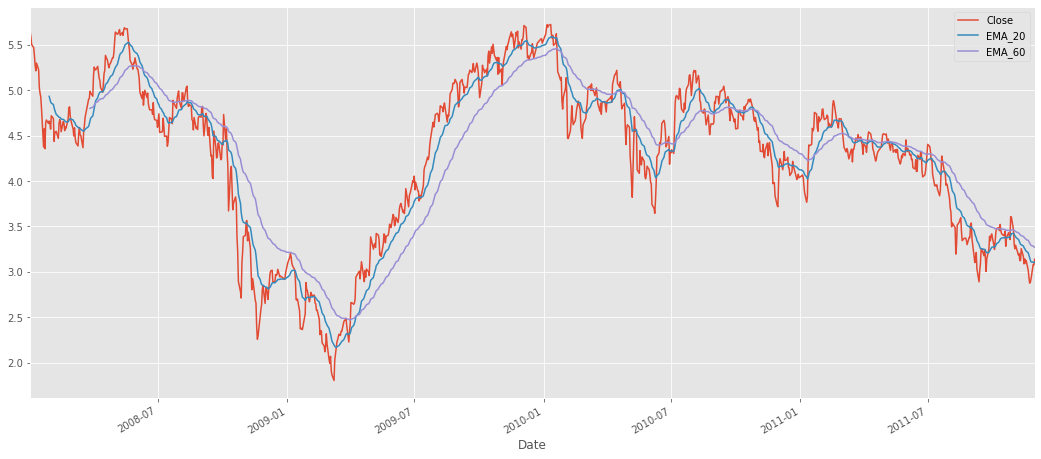

In [45]:
san[['Close','EMA_20','EMA_60']].iloc[:1000].plot()

Podemos definir una función para realizar un calculo o tarea que vamos a repetir varías veces, haciendo el código mas eficiente.

Por ejemplo para calcular y añadir al DataFrame varias EMAs con distintos periodos.

In [46]:
def add_emas (df, periods, close='Close'):  
# Definimos la función para aceptar un DataFrame, una lista de periodos y por defecto usar la columna Close.
    import ta
    for period in periods:
        name = f'EMA_{period}'
        df[name] = ta.trend.ema_indicator(df[close], period)
    return df

Ahora pasamos a la función la tabla del Santader y una lista de periodos para el EMA.

In [47]:
periodos = [7,14,28,60,90,120,180,200,260,500]
san_emas = add_emas(san, periods=periodos)

Podemos ver como se han añadido nuevas columnas con los EMAs calculados, y graficarlos.

In [48]:
san_emas.head()

,Open,High,Low,Close,Volume,SMA_7,SMA_14,EMA_20,EMA_60,EMA_7,EMA_14,EMA_28,EMA_90,EMA_120,EMA_180,EMA_200,EMA_260,EMA_500
Date,,,,,,,,,,,,,,,,,,
2008-01-02,5.668846,5.703632,5.603124,5.637910,103998100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,5.622465,5.649506,5.549042,5.583828,113222703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,5.564488,5.599274,5.436982,5.502660,100543802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,5.483363,5.522000,5.429237,5.467916,71995342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,5.471767,5.479469,5.348112,5.382898,83100401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


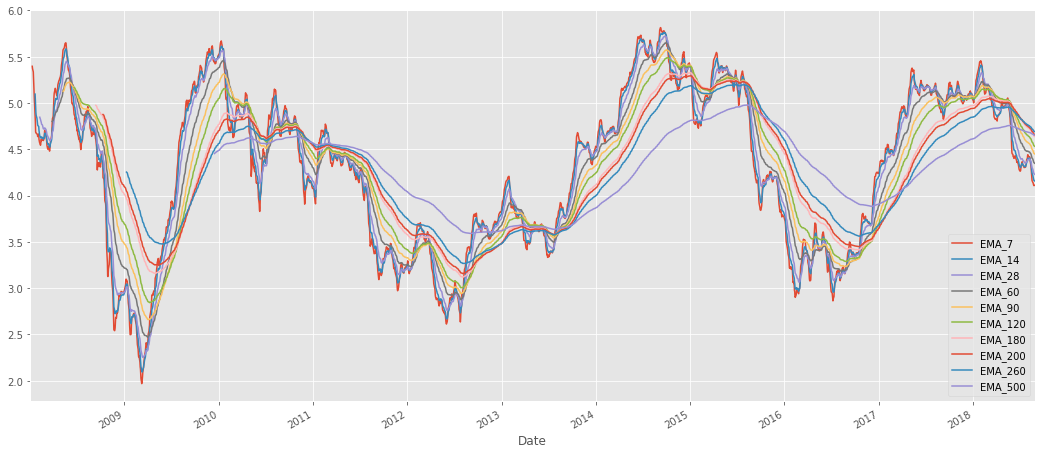

In [49]:
emas = [f'EMA_{p}' for p in periodos]
san_emas[emas].plot()

Como último ejemplo de indicador calculemos el ATR de 7 días y lo graficamos junto con el precio de cierre.

In [50]:
san['ATR_7'] = ta.volatility.average_true_range(san.High, san.Low, san.Close, n=7)

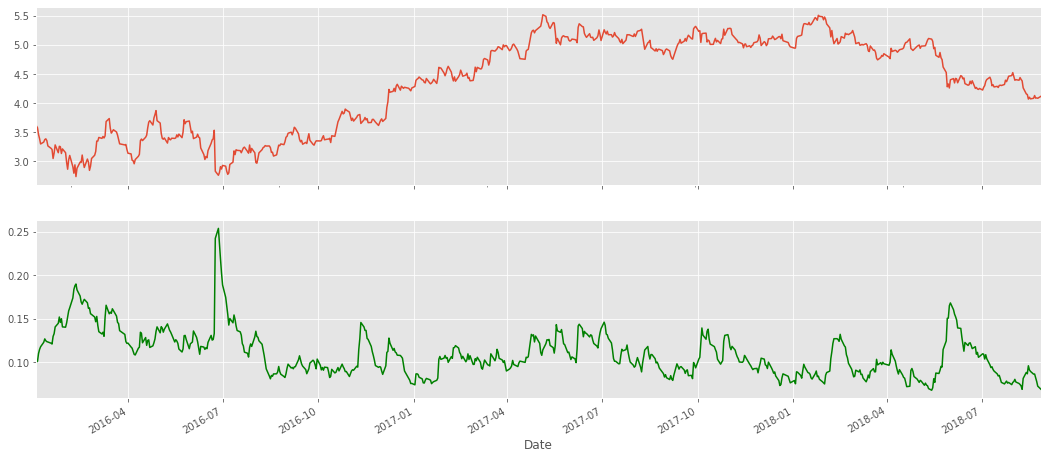

In [51]:
# Usamos subplot para obtener dos gráficos juntos y hacemos que compartan el eje de X.
ax1 = plt.subplot(211)  
san['2016':]['Close'].plot()
ax1 = plt.subplot(212)
san['2016':]['ATR_7'].plot(c='g', sharex=ax1)

---

## Relaciones entre los dos valores.

Veamos ahora que tal se relacionan algunos valores de estas dos acciones.

Comenzamos por calcular los retornos diarios.

In [52]:
san['rets'] = san['Close'].pct_change()
bbva['rets'] = bbva['Close'].pct_change()

Podemos compararlos usando un histograma conjunto.

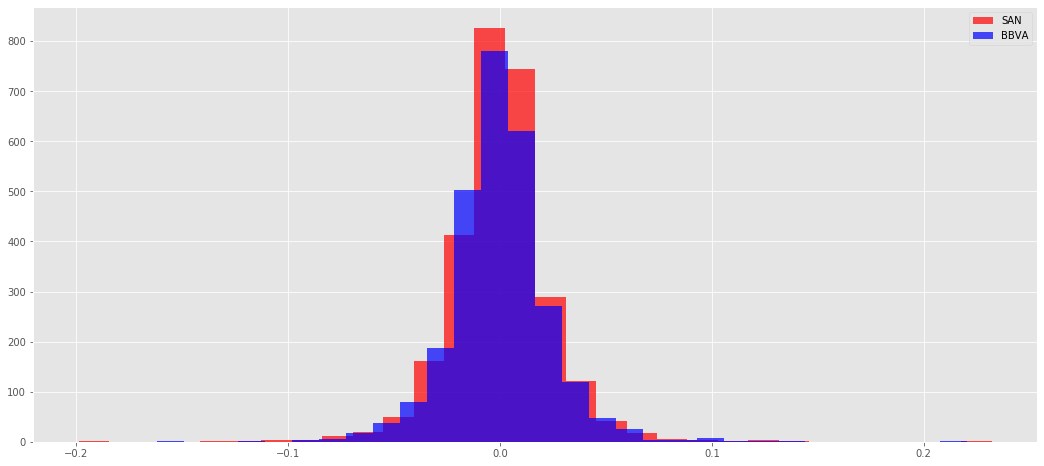

In [53]:
san['rets'].hist(bins=30, alpha=0.7, color='r')
bbva['rets'].hist(bins=30, alpha=0.7, color='b')
plt.legend(['SAN','BBVA'])

Podemos comparar de esta manera cualquier variable que calculemos de los activos, como por ejemplo los gaps entre el cierre y apertura del siguiente día.

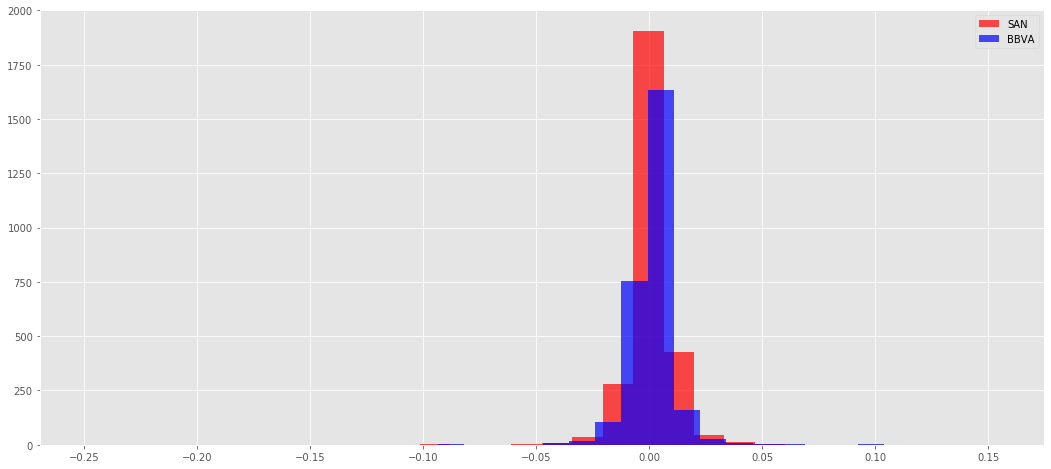

In [54]:
san['Gap'] = (san['Open'] - san['Close'].shift(1))/ san['Close'].shift(1)
bbva['Gap'] = (bbva['Open'] - bbva['Close'].shift(1))/ bbva['Close'].shift(1)
san['Gap'].hist(bins=30, alpha=0.7, color='r')
bbva['Gap'].hist(bins=30, alpha=0.7, color='b')
plt.legend(['SAN','BBVA'])

Usando un gráfico de dispersión podemos visualizar la relación entre un gap y la diferencia entre apertura y cierre del día.

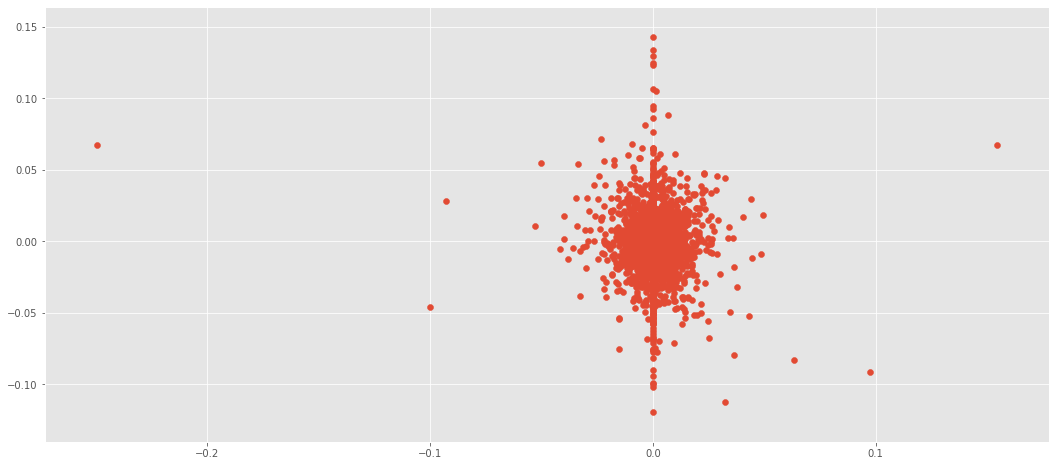

In [55]:
plt.scatter(san.Gap, (san.Close-san.Open)/san.Open)

Y calcular el valor de la correlación entre ambos valores, usando la función __corr__ de Pandas.

Para comprobar que, como nos indica el gráfico, apenas existe correlación, pues el valor esta cercano a cero.

In [56]:
san.Gap.corr((san.Close-san.Open)/san.Open)

-0.06951631317688634

---

Calculemos la correlación entre los retornos diarios de ambos valores.

In [57]:
san.rets.corr(bbva.rets)

0.9231651527844777

Vemos que la correlación es positiva y cercana a 1, luego podría existir una correlación positiva entre los retornos.

Veámoslo graficando las series de retornos superpuestas.

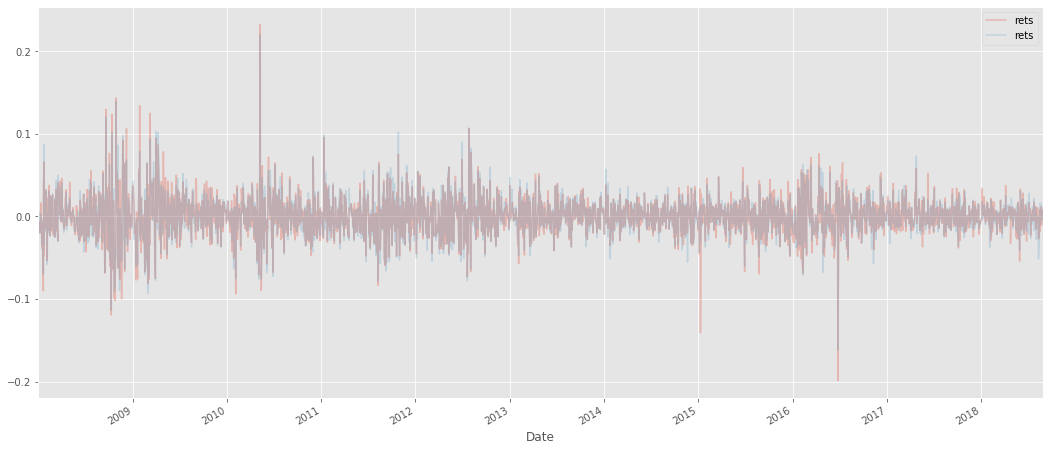

In [58]:
san.rets.plot(alpha=0.3) # alpha define el grado de transparencia.
bbva.rets.plot(alpha=0.2)
plt.legend()

En este gráfico vemos la diferencia entre los retornos del Santander y los del BBVA. Ademas añadimos la media simple de 22 días de está diferencia. 

Podemos comprobar como la media es cercana a cero aunque con cierta oscilación.

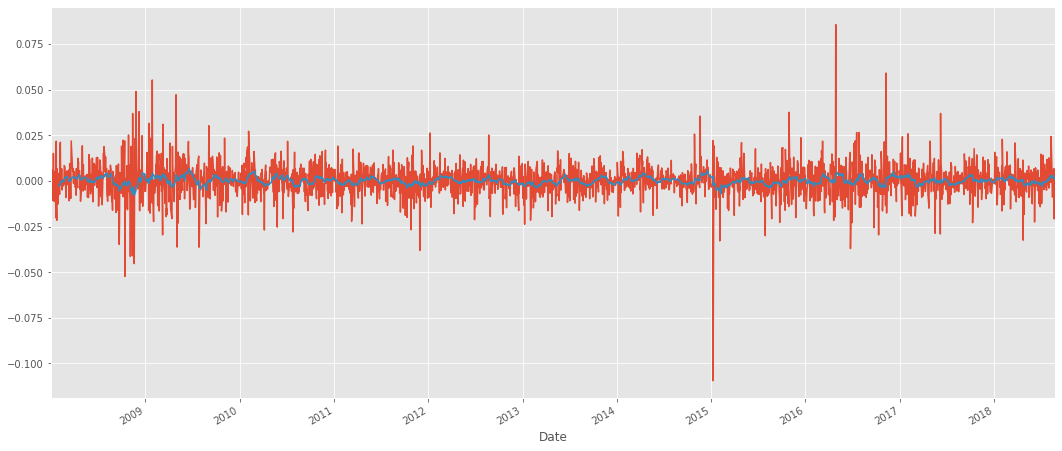

In [59]:
(san.rets-bbva.rets).plot()
(san.rets-bbva.rets).rolling(22).mean().plot()

Vemos ahora la evolución de la correlación en el tiempo calculando la misma para una ventana de desplazamiento o rodante de 90 días.

Vemos como no es constante, siendo en algunos periodos mas cercana a 1, que en otros. Desde 2017 parece haberse deteriorado esa correlación.

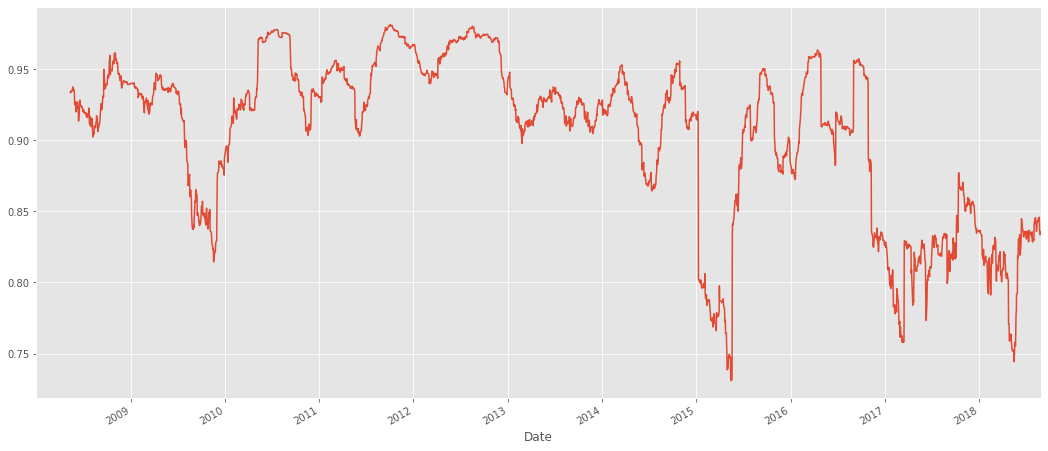

In [60]:
san.rets.rolling(90).corr(bbva.rets.rolling(90)).plot()

Un gráfico de dispersión nos muestra como los retornos se agrupan alrededor de una posible linea.

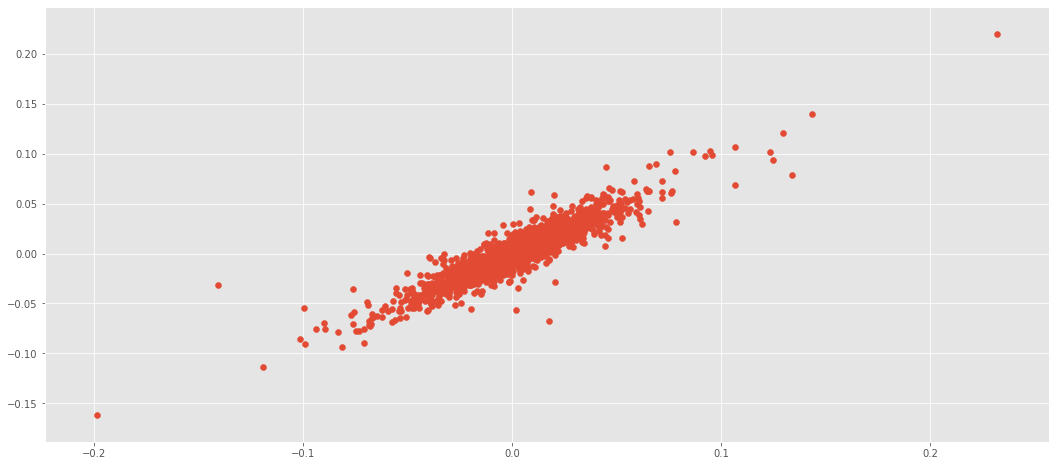

In [61]:
plt.scatter(san.rets, bbva.rets)

Para hacer esto mas evidente, calculamos y graficamos esa linea, que no es otra cosa que una regresión lineal.

Para ello vamos a usar el módulo **Seaborn**, que tiene funciones mas potentes que **Matplotlib**. 

En este caso usamos la función **regplot**, que sobre el gráfico de dispersión traza la linea de la regresión lineal calculada.

In [62]:
import seaborn as sns

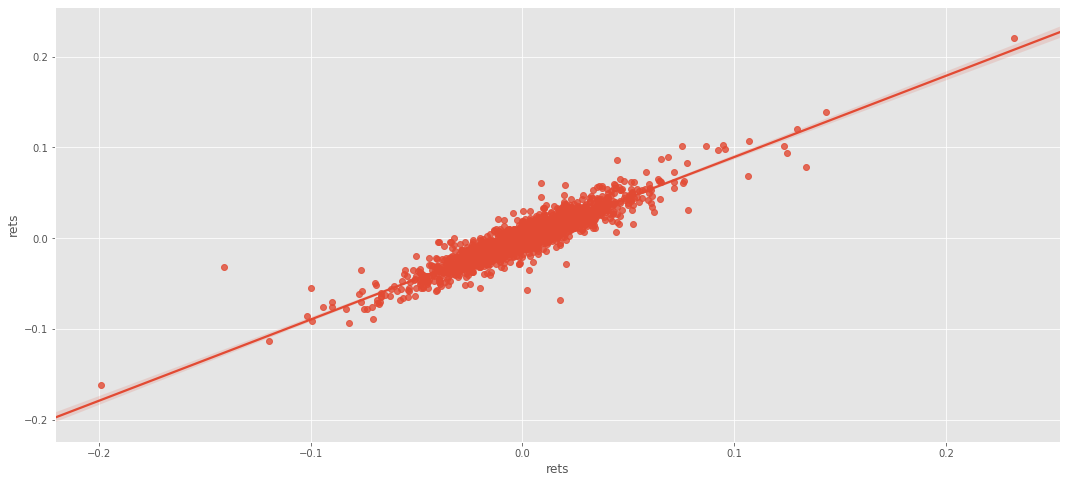

In [63]:
sns.regplot(san.rets, bbva.rets, order=1)

Trazamos ahora un gráfico de dispersión pero con los valores de cierre.

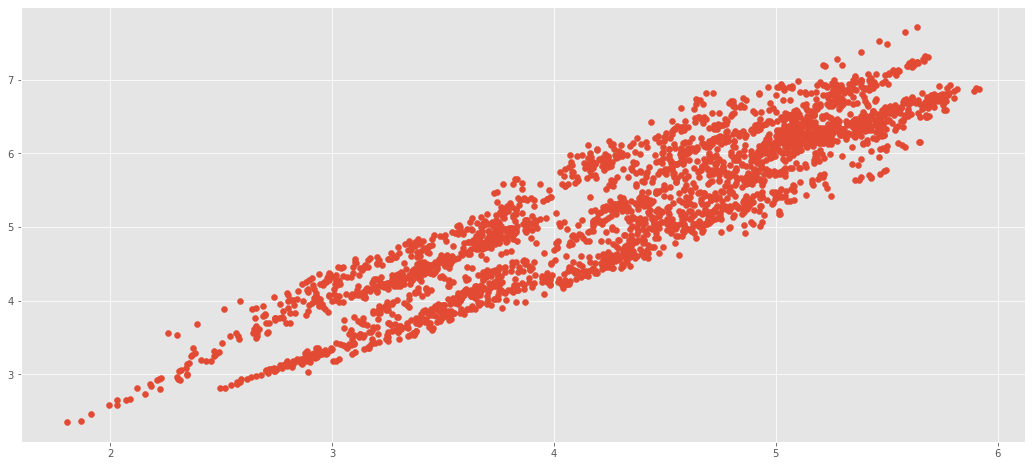

In [64]:
plt.scatter(san.Close, bbva.Close)

Podemos usar la función _corr_ para calcular la correlación entre los valores de las columnas de un DataFrame.

En el DataFrame **diario** tenemos los precios de cierre ajustado de ambos valores, veamos la correlación.

In [65]:
diario.corr()

,san,bbva
san,1.000000,0.915643
bbva,0.915643,1.000000


Usamos de nuevo **regplot** para trazar la linea de regresión lineal.

Vemos que en esta ocasión los valores no se encuentran tan agrupados cerca de la linea.

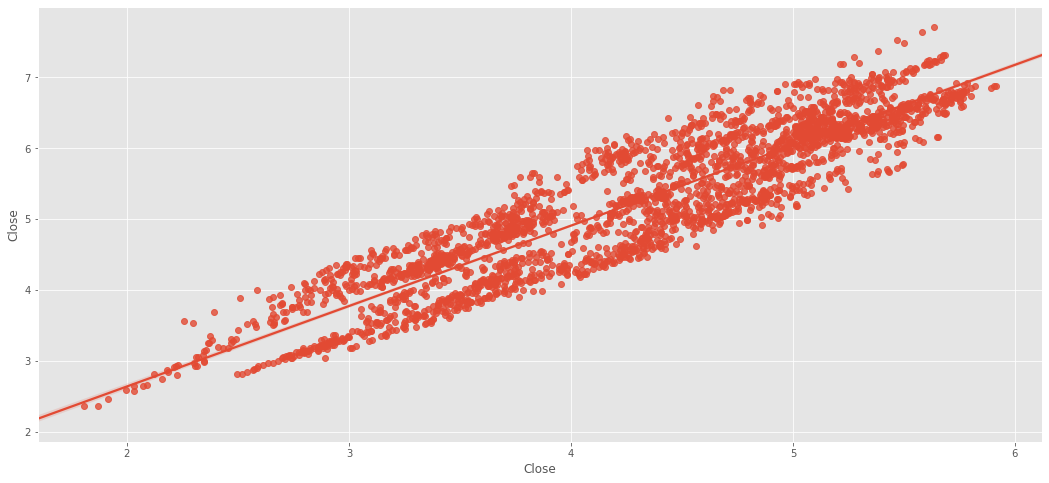

In [66]:
sns.regplot(san.Close, bbva.Close, order=1)

Por último trazamos un gráfico para ver como se distribuyen los precios de cierres del Santander frente al BBVA a lo largo del tiempo, usando para ello el mismo gráfico de dispersión pero añadiendo un mapa de color en función del tiempo.

Vemos como los precios aparecen mas agrupados según los años.

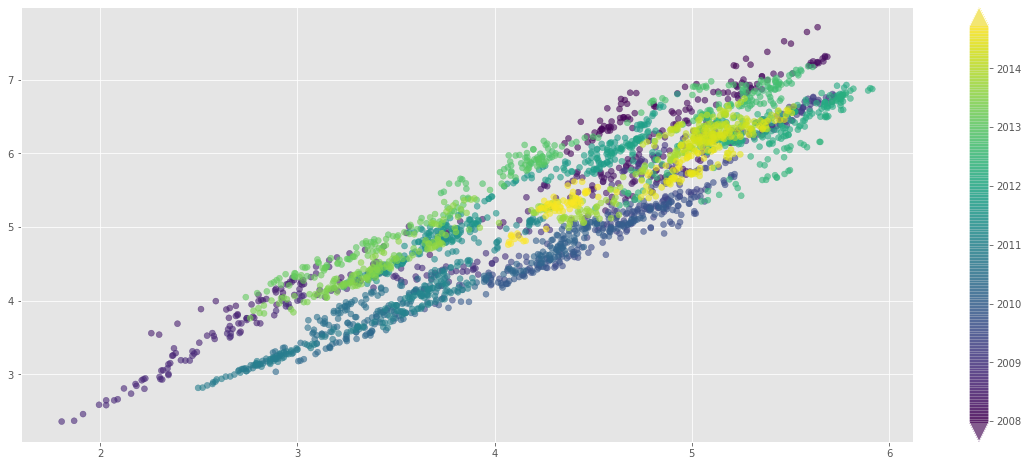

In [67]:
years=san.index.year.unique()
fig = plt.figure(figsize=(20,8))
scatter=plt.scatter(san.Close, bbva.Close, alpha = .6, c = san.index, cmap = 'viridis')
cb = plt.colorbar(extend='both')
cb.ax.set_yticklabels(years)
plt.show() 

---